# Video Processing Exploration 

## Project: Smart Media Analyzer (Frugal Architecture)

### Goals
- Test video scene detection with PySceneDetect
- Document timing and accuracy for different video types

### Current Stack
- **Python:** 3.11.13 (UV managed)
- **Scene Detection:** PySceneDetect 0.6.6
- **Video Processing:** OpenCV 4.11.0

### Test Videos
- `Giant_Oarfish.mp4` - Nature documentary (~68 seconds)
- More videos to be added...

---

### Video Processing Setup - Testing imports and timing

In [ ]:
#!/usr/bin/env python3
"""
Video Processing Setup - Testing imports and timing
"""
import time
import os
from datetime import datetime
from datetime import datetime

def log_time(message):
    """Print message with timestamp for performance tracking"""
    timestamp = datetime.now().strftime("%H:%M:%S.%f")[:-3]
    print(f"[{timestamp}] {message}")

# Test imports with timing
log_time("=== Starting Video Processing Setup ===")

log_time("Importing cv2...")
start = time.time()
import cv2
log_time(f"cv2 imported in {time.time() - start:.3f}s - Version: {cv2.__version__}")

log_time("Importing scenedetect...")
start = time.time()
from scenedetect import detect, ContentDetector
log_time(f"scenedetect imported in {time.time() - start:.3f}s")

log_time("All imports successful!")

[13:57:53.970] === Starting Video Processing Setup ===
[13:57:53.971] Importing cv2...
[13:57:55.935] cv2 imported in 1.964s - Version: 4.11.0
[13:57:55.935] Importing scenedetect...
[13:57:58.060] scenedetect imported in 2.125s
[13:57:58.060] All imports successful!


### Analyzing video file using OpenCV module

In [10]:
def analyze_video_file(video_path):
    """Get detailed information about a video file"""
    log_time(f"Analyzing video file: {video_path}")
    
    # Check if file exists
    if not os.path.exists(video_path):
        print(f"ERROR: Video file not found: {video_path}")
        return None
    
    file_size_mb = os.path.getsize(video_path) / (1024 * 1024)
    log_time(f"File exists - Size: {file_size_mb:.2f} MB")
    
    # Get video properties using OpenCV
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("ERROR: Cannot open video with OpenCV")
        return None
    
    # Extract video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    duration = frame_count / fps if fps > 0 else 0
    
    cap.release()
    
    # Display results
    print(f"Current Time: {datetime.now()}")
    print(f" Video Properties:")
    print(f"   Resolution: {width} x {height}")
    print(f"   FPS: {fps:.2f}")
    print(f"   Duration: {duration:.2f} seconds")
    print(f"   Total Frames: {frame_count}")
    print(f"   File Size: {file_size_mb:.2f} MB")
    
    return {
        'width': width, 'height': height, 'fps': fps,
        'duration': duration, 'frames': frame_count, 'size_mb': file_size_mb
    }

# Test with your Giant Oarfish video
video_file = "../Samples_Video-Images/Giant_Oarfish.mp4"
print(f"Analyzing video file: {video_file}")
video_info = analyze_video_file(video_file)

Analyzing video file: ../Samples_Video-Images/Giant_Oarfish.mp4
[14:03:37.646] Analyzing video file: ../Samples_Video-Images/Giant_Oarfish.mp4
[14:03:37.647] File exists - Size: 11.76 MB
Current Time: 2025-07-21 14:03:37.661084
 Video Properties:
   Resolution: 1280 x 720
   FPS: 23.98
   Duration: 67.86 seconds
   Total Frames: 1627
   File Size: 11.76 MB


### Scene Detection Analysis

In [16]:
def detect_scenes_with_analysis(video_path, threshold=27.0):
    """
    Detect scenes and provide detailed analysis
    """
    log_time(f"Starting scene detection (threshold={threshold})")
    
    start_time = time.time()
    
    # Detect scenes using ContentDetector
    scene_list = detect(video_path, ContentDetector(threshold=threshold))
    
    detection_time = time.time() - start_time
    log_time(f"Scene detection completed in {detection_time:.2f}s")
    
    # Analysis
    total_scenes = len(scene_list)
    log_time(f"Found {total_scenes} scenes")
    
    if total_scenes == 0:
        print("⚠️  No scenes detected - video might be too uniform")
        return scene_list
    
    # Calculate scene statistics
    durations = []
    print(f"\n📊 Scene Analysis:")
    print(f"{'Scene':<8} {'Start':<8} {'End':<8} {'Duration':<10}")
    print("-" * 35)
    
    for i, scene in enumerate(scene_list):
        start_sec = scene[0].get_seconds()
        end_sec = scene[1].get_seconds()
        duration = end_sec - start_sec
        durations.append(duration)
        
        print(f"{i+1:<8} {start_sec:<8.2f} {end_sec:<8.2f} {duration:<10.2f}")
    
    # Statistics
    avg_duration = sum(durations) / len(durations)
    min_duration = min(durations)
    max_duration = max(durations)
    
    print(f"\n📈 Scene Statistics:")
    print(f"   Total scenes: {total_scenes}")
    print(f"   Average duration: {avg_duration:.2f}s")
    print(f"   Shortest scene: {min_duration:.2f}s")
    print(f"   Longest scene: {max_duration:.2f}s")
    print(f"   Processing speed: {67.86/detection_time:.1f}x real-time")
    
    return scene_list

# Run scene detection on your video
scenes = detect_scenes_with_analysis(video_file)

[15:18:02.887] Starting scene detection (threshold=27.0)
[15:18:05.377] Scene detection completed in 2.49s
[15:18:05.377] Found 34 scenes

📊 Scene Analysis:
Scene    Start    End      Duration  
-----------------------------------
1        0.00     1.33     1.33      
2        1.33     2.54     1.21      
3        2.54     5.21     2.67      
4        5.21     6.34     1.13      
5        6.34     10.30    3.96      
6        10.30    11.64    1.33      
7        11.64    12.89    1.25      
8        12.89    15.43    2.54      
9        15.43    16.60    1.17      
10       16.60    19.06    2.46      
11       19.06    21.94    2.88      
12       21.94    23.23    1.29      
13       23.23    25.61    2.38      
14       25.61    27.99    2.38      
15       27.99    29.07    1.08      
16       29.07    30.86    1.79      
17       30.86    32.24    1.38      
18       32.24    34.03    1.79      
19       34.03    35.95    1.92      
20       35.95    41.54    5.59      
21       

### Threshold Experimentation (Code Cell)

In [11]:
def test_multiple_videos_with_thresholds():
    """
    Test scene detection with multiple videos and different thresholds
    """
    log_time("=== Testing Multiple Video Files with Threshold Analysis ===")
    
    # List your available video files here
    video_files = [
        "../Samples_Video-Images/Giant_Oarfish.mp4",
        "../Samples_Video-Images/SoccorShootout_1.mp4"
    ]
    
    # Check which files exist
    available_videos = []
    for video_path in video_files:
        if os.path.exists(video_path):
            available_videos.append(video_path)
            print(f"✅ Found: {video_path}")
        else:
            print(f"❌ Missing: {video_path}")
    
    print(f"\n{'='*60}")
    
    # Test each video with different thresholds
    thresholds = [15.0, 20.0, 27.0, 35.0, 45.0]
    all_results = {}
    
    for video_path in available_videos:
        print(f"\n🎬 Analyzing: {os.path.basename(video_path)}")
        
        # Get video info first
        video_info = analyze_video_file(video_path)
        if not video_info:
            continue
            
        print(f"\n📊 Threshold Analysis for {os.path.basename(video_path)}:")
        print(f"{'Threshold':<12} {'Scenes':<8} {'Avg Duration':<12} {'Time':<8}")
        print("-" * 45)
        
        video_results = []
        
        for threshold in thresholds:
            start_time = time.time()
            scene_list = detect(video_path, ContentDetector(threshold=threshold))
            detection_time = time.time() - start_time
            
            scene_count = len(scene_list)
            avg_duration = video_info['duration'] / scene_count if scene_count > 0 else 0
            
            video_results.append({
                'threshold': threshold,
                'scenes': scene_count,
                'avg_duration': avg_duration,
                'time': detection_time
            })
            
            print(f"{threshold:<12} {scene_count:<8} {avg_duration:<12.2f} {detection_time:<8.2f}s")
        
        all_results[video_path] = {
            'info': video_info,
            'threshold_results': video_results
        }
        
        print(f"\n{'='*60}")
    
    # Comparison summary
    if len(available_videos) > 1:
        print(f"\n🔍 Video Comparison Summary (threshold=27.0):")
        print(f"{'Video':<25} {'Duration':<10} {'Scenes':<8} {'Avg Scene':<10} {'Type':<15}")
        print("-" * 75)
        
        for video_path in available_videos:
            if video_path in all_results:
                info = all_results[video_path]['info']
                # Find threshold=27.0 result
                result_27 = next(r for r in all_results[video_path]['threshold_results'] if r['threshold'] == 27.0)
                
                video_name = os.path.basename(video_path)[:20]
                video_type = "Nature Doc" if "oarfish" in video_path.lower() else "Sports" if "soccor" in video_path.lower() else "Unknown"
                
                print(f"{video_name:<25} {info['duration']:<10.1f} {result_27['scenes']:<8} {result_27['avg_duration']:<10.2f} {video_type:<15}")
    
    return all_results

# Run multi-video threshold analysis
multi_video_results = test_multiple_videos_with_thresholds()

[14:04:06.090] === Testing Multiple Video Files with Threshold Analysis ===
✅ Found: ../Samples_Video-Images/Giant_Oarfish.mp4
✅ Found: ../Samples_Video-Images/SoccorShootout_1.mp4


🎬 Analyzing: Giant_Oarfish.mp4
[14:04:06.090] Analyzing video file: ../Samples_Video-Images/Giant_Oarfish.mp4
[14:04:06.090] File exists - Size: 11.76 MB
Current Time: 2025-07-21 14:04:06.103818
 Video Properties:
   Resolution: 1280 x 720
   FPS: 23.98
   Duration: 67.86 seconds
   Total Frames: 1627
   File Size: 11.76 MB

📊 Threshold Analysis for Giant_Oarfish.mp4:
Threshold    Scenes   Avg Duration Time    
---------------------------------------------
15.0         38       1.79         2.62    s
20.0         38       1.79         2.58    s
27.0         34       2.00         2.53    s
35.0         32       2.12         2.42    s
45.0         23       2.95         2.64    s


🎬 Analyzing: SoccorShootout_1.mp4
[14:04:18.890] Analyzing video file: ../Samples_Video-Images/SoccorShootout_1.mp4
[14:04:18.890

### Frame Extraction Function
Extract the frames from the above scene detection logic.

[15:18:20.393] === Testing Frame Extraction ===
[15:18:20.393] Extracting keyframes from 34 scenes...
[15:18:20.909] ✅ Extracted 34 keyframes from 34 scenes
[15:18:20.909] Displaying first 9 keyframes...


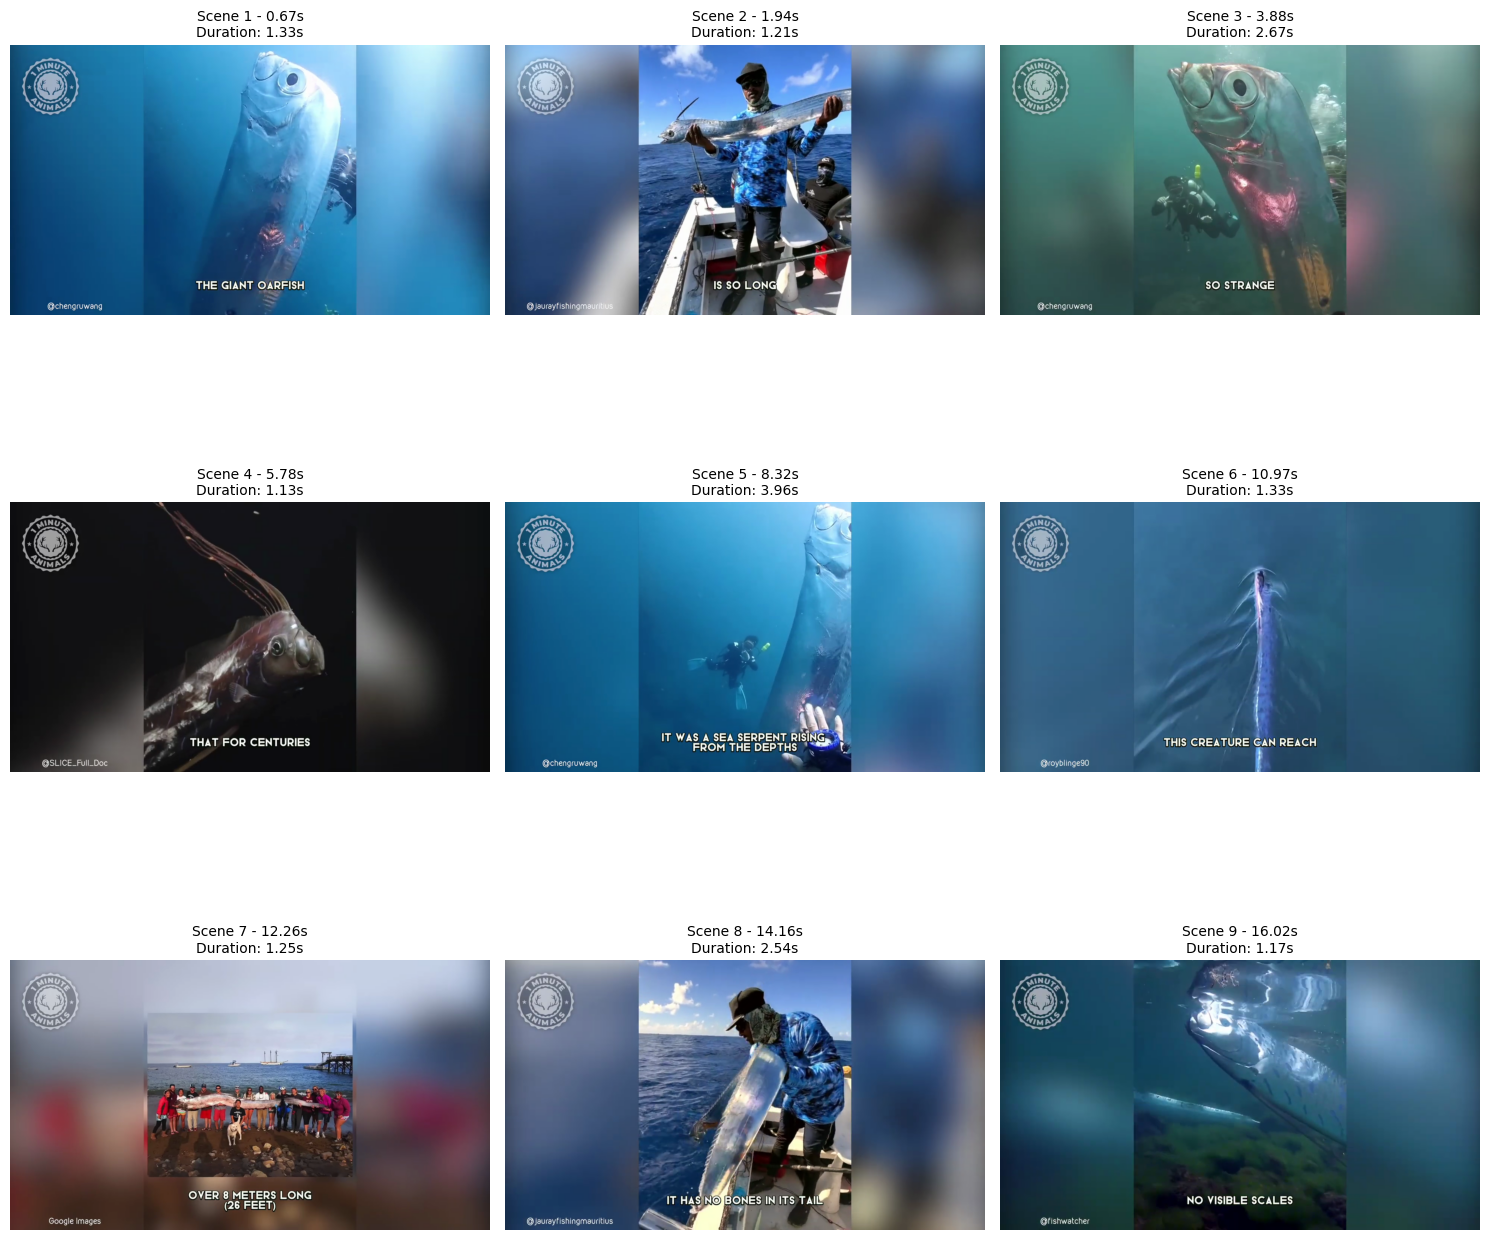

[15:18:22.039] 📄 Saved metadata for 34 frames to giant_oarfish_keyframes.json


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100

def extract_keyframes_from_scenes(video_path, scene_list, frames_per_scene=1, frame_position='middle'):
    """
    Extract keyframes from detected scenes
    
    Args:
        video_path: Path to video file
        scene_list: List of scenes from PySceneDetect
        frames_per_scene: Number of frames to extract per scene (1, 2, or 3)
        frame_position: 'start', 'middle', 'end', or 'all'
    
    Returns:
        List of frame data with metadata
    """
    log_time(f"Extracting keyframes from {len(scene_list)} scenes...")
    
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"❌ Cannot open video: {video_path}")
        return []
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames_extracted = 0
    extracted_frames = []
    
    for scene_idx, scene in enumerate(scene_list):
        scene_start_sec = scene[0].get_seconds()
        scene_end_sec = scene[1].get_seconds()
        scene_duration = scene_end_sec - scene_start_sec
        
        # Calculate frame positions based on preference
        frame_times = []
        
        if frame_position == 'start':
            frame_times = [scene_start_sec + 0.1]  # 0.1s after start
        elif frame_position == 'end':
            frame_times = [scene_end_sec - 0.1]    # 0.1s before end
        elif frame_position == 'middle':
            frame_times = [scene_start_sec + (scene_duration / 2)]
        elif frame_position == 'all' and frames_per_scene == 3:
            frame_times = [
                scene_start_sec + (scene_duration * 0.2),  # 20% into scene
                scene_start_sec + (scene_duration * 0.5),  # 50% into scene  
                scene_start_sec + (scene_duration * 0.8)   # 80% into scene
            ]
        
        # Extract frames at calculated times
        for frame_idx, frame_time in enumerate(frame_times):
            frame_number = int(frame_time * fps)
            
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
            ret, frame = cap.read()
            
            if ret:
                # Convert BGR to RGB for matplotlib
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                
                extracted_frames.append({
                    'scene_number': scene_idx + 1,
                    'frame_index': frame_idx + 1,
                    'timestamp': frame_time,
                    'scene_start': scene_start_sec,
                    'scene_end': scene_end_sec,
                    'scene_duration': scene_duration,
                    'frame_number': frame_number,
                    'frame_data': frame_rgb,
                    'frame_shape': frame_rgb.shape
                })
                
                total_frames_extracted += 1
    
    cap.release()
    log_time(f"✅ Extracted {total_frames_extracted} keyframes from {len(scene_list)} scenes")
    
    return extracted_frames

def visualize_extracted_keyframes(extracted_frames, max_display=10):
    """
    Display extracted keyframes in a grid
    """
    if not extracted_frames:
        print("❌ No frames to display")
        return
    
    frames_to_show = min(max_display, len(extracted_frames))
    log_time(f"Displaying first {frames_to_show} keyframes...")
    
    # Calculate grid dimensions
    cols = 3 if frames_to_show > 6 else 2 if frames_to_show > 2 else 1
    rows = (frames_to_show + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if rows == 1 and cols == 1:
        axes = [axes]
    elif rows == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i in range(frames_to_show):
        frame_info = extracted_frames[i]
        
        axes[i].imshow(frame_info['frame_data'])
        axes[i].set_title(
            f"Scene {frame_info['scene_number']} - {frame_info['timestamp']:.2f}s\n"
            f"Duration: {frame_info['scene_duration']:.2f}s", 
            fontsize=10
        )
        axes[i].axis('off')
    
    # Hide empty subplots
    for i in range(frames_to_show, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

def save_keyframes_metadata(extracted_frames, output_file="keyframes_metadata.json"):
    """
    Save keyframe metadata to JSON file (without actual image data)
    """
    import json
    
    metadata = []
    for frame_info in extracted_frames:
        metadata.append({
            'scene_number': frame_info['scene_number'],
            'frame_index': frame_info['frame_index'],
            'timestamp': frame_info['timestamp'],
            'scene_start': frame_info['scene_start'],
            'scene_end': frame_info['scene_end'],
            'scene_duration': frame_info['scene_duration'],
            'frame_number': frame_info['frame_number'],
            'frame_shape': frame_info['frame_shape']
        })
    
    with open(output_file, 'w') as f:
        json.dump(metadata, f, indent=2)
    
    log_time(f"📄 Saved metadata for {len(metadata)} frames to {output_file}")

# Test frame extraction with your video
log_time("=== Testing Frame Extraction ===")

# Extract middle frame from each scene for Giant Oarfish video
oarfish_frames = extract_keyframes_from_scenes(
    "../Samples_Video-Images/Giant_Oarfish.mp4", 
    scenes,  # Using scenes from previous cell
    frames_per_scene=1,
    frame_position='middle'
)

# Display the keyframes
visualize_extracted_keyframes(oarfish_frames, max_display=9)

# Save metadata
save_keyframes_metadata(oarfish_frames, "giant_oarfish_keyframes.json")

### OpenCLIP Exploration
https://openai.com/index/clip/
#### Test OpenCLIP installation

In [18]:
# Test OpenCLIP installation
try:
    import open_clip
    import torch
    
    print(f"✅ OpenCLIP imported successfully")
    print(f"✅ PyTorch version: {torch.__version__}")
    print(f"✅ MPS (M1 GPU) available: {torch.backends.mps.is_available()}")
    
    # List available models
    available_models = open_clip.list_pretrained()
    print(f"✅ Available models: {len(available_models)} models found")
    print("First few models:", available_models[:3])
    
except ImportError as e:
    print(f"❌ Import error: {e}")

✅ OpenCLIP imported successfully
✅ PyTorch version: 2.7.1
✅ MPS (M1 GPU) available: True
✅ Available models: 180 models found
First few models: [('RN50', 'openai'), ('RN50', 'yfcc15m'), ('RN50', 'cc12m')]


#### Basic OpenCLIP; first frame demo

In [19]:
import open_clip
import torch
from PIL import Image
import requests
import numpy as np

# Load a lightweight model optimized for M1
model, preprocess = open_clip.create_model_from_pretrained(
    'ViT-B-32', 
    pretrained='openai',
    device='mps' if torch.backends.mps.is_available() else 'cpu'
)

tokenizer = open_clip.get_tokenizer('ViT-B-32')

log_time("✅ OpenCLIP model loaded successfully")

# Test with one of your extracted keyframes
def analyze_keyframe_with_openclip(frame_data, text_queries):
    """
    Analyze a keyframe using OpenCLIP
    """
    # Convert your extracted frame to PIL Image
    pil_image = Image.fromarray(frame_data)
    
    # Preprocess image
    image_input = preprocess(pil_image).unsqueeze(0)
    if torch.backends.mps.is_available():
        image_input = image_input.to('mps')
    
    # Tokenize text queries
    text_input = tokenizer(text_queries)
    if torch.backends.mps.is_available():
        text_input = text_input.to('mps')
    
    # Generate embeddings
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_input)
        
        # Calculate similarities
        similarities = (image_features @ text_features.T).softmax(dim=-1)
    
    return similarities.cpu().numpy()[0]

# Test with your first keyframe
if 'oarfish_frames' in globals() and len(oarfish_frames) > 0:
    test_queries = [
        "a large fish swimming underwater",
        "marine life in the ocean", 
        "underwater scene",
        "a person on land",
        "a car driving"
    ]
    
    similarities = analyze_keyframe_with_openclip(
        oarfish_frames[0]['frame_data'], 
        test_queries
    )
    
    print("🎯 Similarity Scores for First Keyframe:")
    for query, score in zip(test_queries, similarities):
        print(f"   {query}: {score:.3f}")
        
    # Find best match
    best_match_idx = np.argmax(similarities)
    print(f"\n🏆 Best match: '{test_queries[best_match_idx]}' (score: {similarities[best_match_idx]:.3f})")

open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
/Users/sonish/Documents/Workspace/smart-media-analyzer/.venv/lib/python3.11/site-packages/open_clip/factory.py:388: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


[15:45:28.091] ✅ OpenCLIP model loaded successfully
🎯 Similarity Scores for First Keyframe:
   a large fish swimming underwater: 0.166
   marine life in the ocean: 0.807
   underwater scene: 0.016
   a person on land: 0.010
   a car driving: 0.001

🏆 Best match: 'marine life in the ocean' (score: 0.807)


#### Analyze first few frames using OpenCLIP

In [23]:
# Test with first 5 keyframes
if 'oarfish_frames' in globals() and len(oarfish_frames) > 0:
    test_queries = [
        "a large fish swimming underwater",
        "marine life in the ocean", 
        "underwater scene",
        "a person on land",
        "a car driving"
    ]
    
    total_frames = len(oarfish_frames)
    frames_to_analyze = min(5, total_frames)  # In case there are fewer than 5 frames
    
    print(f"🎯 Analyzing first 5 frames from {total_frames} total frames:")
    print("=" * 60)
    
    for i in range(frames_to_analyze):
        frame_info = oarfish_frames[i]
        
        # Analyze this frame
        similarities = analyze_keyframe_with_openclip(
            frame_info['frame_data'], 
            test_queries
        )
        
        print(f"\n📋 Frame {i+1}/5 - Scene {frame_info['scene_number']} at {frame_info['timestamp']:.2f}s:")
        print("-" * 40)
        
        # Show all similarity scores
        for query, score in zip(test_queries, similarities):
            print(f"   {query}: {score:.3f}")
        
        # Find and highlight best match
        best_match_idx = np.argmax(similarities)
        best_score = similarities[best_match_idx]
        print(f"   🏆 Best: '{test_queries[best_match_idx]}' ({best_score:.3f})")
        
        # Show confidence level
        if best_score > 0.7:
            confidence = "🟢 High confidence"
        elif best_score > 0.5:
            confidence = "🟡 Medium confidence"
        else:
            confidence = "🔴 Low confidence"
        print(f"   {confidence}")

🎯 Analyzing first 5 frames from 34 total frames:

📋 Frame 1/5 - Scene 1 at 0.67s:
----------------------------------------
   a large fish swimming underwater: 0.166
   marine life in the ocean: 0.807
   underwater scene: 0.016
   a person on land: 0.010
   a car driving: 0.001
   🏆 Best: 'marine life in the ocean' (0.807)
   🟢 High confidence

📋 Frame 2/5 - Scene 2 at 1.94s:
----------------------------------------
   a large fish swimming underwater: 0.069
   marine life in the ocean: 0.243
   underwater scene: 0.004
   a person on land: 0.678
   a car driving: 0.006
   🏆 Best: 'a person on land' (0.678)
   🟡 Medium confidence

📋 Frame 3/5 - Scene 3 at 3.88s:
----------------------------------------
   a large fish swimming underwater: 0.548
   marine life in the ocean: 0.186
   underwater scene: 0.254
   a person on land: 0.011
   a car driving: 0.001
   🏆 Best: 'a large fish swimming underwater' (0.548)
   🟡 Medium confidence

📋 Frame 4/5 - Scene 4 at 5.78s:
-----------------------

#### OpenCLIP Comprehensive Analysis

Creates category vocabulary - Defines 50+ visual concepts across marine life, environments, objects, actions, and visual properties.

Analyzes keyframes - Compares each frame against all categories using AI vision-language understanding.

Returns structured metadata - Provides confidence scores for detected features (e.g., "large fish: 0.89", "deep sea: 0.78").

Handles edge cases - Uses fallback classification for low-confidence frames to ensure every frame gets some description

[17:00:19.686] === Starting Comprehensive OpenCLIP Analysis ===
🎯 Comprehensive Analysis Results:

🖼️  ANALYZING FRAME:
   Scene 1 at 0.67s


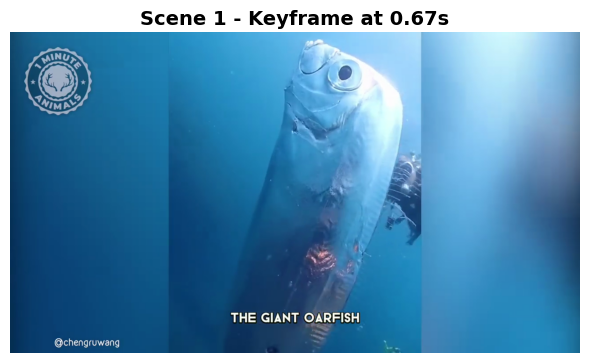


📋 MARINE ANIMALS:
   🟢 large fish: 0.802

📋 LAND ANIMALS:
   🟡 wild animal: 0.561
   🔴 mammal: 0.395

📋 HUMANS:
   🟢 diver: 0.812

📋 WATER ENVIRONMENTS:
   🟢 deep sea: 0.954

📋 LAND ENVIRONMENTS:
   🟡 mountain: 0.547
   🔴 indoor space: 0.232

📋 OBJECTS:
   🟡 ship: 0.683

📋 MOVEMENTS:
   🟡 diving: 0.630
   🔴 floating: 0.333

📋 IMAGE COMPOSITION:
   🟡 medium shot: 0.503
   🔴 close-up: 0.368

📋 LIGHTING CONDITIONS:
   🟡 bright light: 0.400
   🔴 underwater lighting: 0.296
   🔴 dim light: 0.204

📋 GENERAL CONTENT:
   🟢 interesting content: 0.988

📊 ANALYSIS SUMMARY:
   • Quality: HIGH
   • Best confidence: 0.988
   • Features detected: 16
   • Categories tested: 63
[17:00:20.540] ✅ Comprehensive analysis completed


In [26]:
def create_comprehensive_categories():
    """
    Create hierarchical categories covering visual content
    TODO: Expand these category lists for more comprehensive coverage
    """
    categories = {
        # LIVING THINGS
        "marine_animals": [
            "small fish", "large fish", "school of fish", "shark", "whale", 
            "dolphin", "octopus", "jellyfish", "sea turtle", "ray", "eel",
            "marine animal", "sea creature", "underwater animal"
        ],
        
        "land_animals": [
            "bird", "mammal", "reptile", "domestic animal", "wild animal"
        ],
        
        "humans": [
            "person", "people", "diver", "swimmer", "child", "adult"
        ],
        
        # ENVIRONMENTS  
        "water_environments": [
            "ocean", "deep sea", "shallow water", "coral reef", "open water",
            "underwater cave", "clear water", "murky water"
        ],
        
        "land_environments": [
            "beach", "forest", "desert", "mountain", "urban area", "indoor space"
        ],
        
        # OBJECTS & ACTIONS
        "objects": [
            "boat", "ship", "rock", "coral", "seaweed", "equipment"
        ],
        
        "movements": [
            "swimming", "floating", "diving", "resting", "feeding", "hunting"
        ],
        
        # VISUAL PROPERTIES
        "image_composition": [
            "close-up", "wide shot", "medium shot", "underwater view"
        ],
        
        "lighting_conditions": [
            "bright light", "dim light", "underwater lighting", "natural lighting"
        ],
        
        # GENERAL CATEGORIES (fallback)
        "general_content": [
            "natural scene", "calm scene", "interesting content", "documentary style"
        ]
    }
    
    return categories

def analyze_frame_with_fallback(frame_data, confidence_threshold=0.15):
    """
    Comprehensive analysis with fallback for unmatched content
    """
    categories = create_comprehensive_categories()
    
    pil_image = Image.fromarray(frame_data)
    image_input = preprocess(pil_image).unsqueeze(0)
    if torch.backends.mps.is_available():
        image_input = image_input.to('mps')
    
    results = {}
    all_confidences = []
    
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        
        # Analyze each category group
        for category_name, items in categories.items():
            text_input = tokenizer(items)
            if torch.backends.mps.is_available():
                text_input = text_input.to('mps')
                
            text_features = model.encode_text(text_input)
            similarities = (image_features @ text_features.T).softmax(dim=-1)
            
            # Get matches above threshold
            high_confidence_items = []
            for i, score in enumerate(similarities[0]):
                if score > confidence_threshold:
                    high_confidence_items.append({
                        "label": items[i],
                        "confidence": score.item()
                    })
                    all_confidences.append(score.item())
            
            if high_confidence_items:
                # Sort by confidence and keep top 3
                high_confidence_items.sort(key=lambda x: x['confidence'], reverse=True)
                results[category_name] = high_confidence_items[:3]
    
    # FALLBACK for low-confidence frames
    max_confidence = max(all_confidences) if all_confidences else 0
    
    if max_confidence < 0.3:
        fallback_categories = [
            "visual content", "video frame", "general scene", "recorded material"
        ]
        
        text_input = tokenizer(fallback_categories)
        if torch.backends.mps.is_available():
            text_input = text_input.to('mps')
            
        text_features = model.encode_text(text_input)
        similarities = (image_features @ text_features.T).softmax(dim=-1)
        
        best_fallback = similarities[0].argmax()
        results["fallback_classification"] = {
            "label": fallback_categories[best_fallback],
            "confidence": similarities[0][best_fallback].item(),
            "note": "Low confidence - using generic classification"
        }
    
    # Add analysis metadata
    total_categories = sum(len(items) for items in categories.values())
    results["analysis_metadata"] = {
        "total_categories_tested": total_categories,
        "max_confidence": max_confidence,
        "avg_confidence": sum(all_confidences) / len(all_confidences) if all_confidences else 0,
        "features_detected": len(all_confidences),
        "analysis_quality": "high" if max_confidence > 0.7 else "medium" if max_confidence > 0.4 else "low"
    }
    
    return results

# Test with first keyframe
if 'oarfish_frames' in globals() and len(oarfish_frames) > 0:
    log_time("=== Starting Comprehensive OpenCLIP Analysis ===")
    
    # Analyze first frame
    frame_info = oarfish_frames[0]
    result = analyze_frame_with_fallback(
        frame_info['frame_data'], 
        confidence_threshold=0.20
    )
    
    print("🎯 Comprehensive Analysis Results:")
    print("=" * 50)
    
    # DISPLAY FRAME IMAGE FIRST
    print(f"\n🖼️  ANALYZING FRAME:")
    print(f"   Scene {frame_info['scene_number']} at {frame_info['timestamp']:.2f}s")
    
    # Show the image
    plt.figure(figsize=(6, 4))
    plt.imshow(frame_info['frame_data'])
    plt.title(f"Scene {frame_info['scene_number']} - Keyframe at {frame_info['timestamp']:.2f}s", 
              fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Then show analysis results
    for category, items in result.items():
        if category != "analysis_metadata" and category != "fallback_classification":
            print(f"\n📋 {category.upper().replace('_', ' ')}:")
            for item in items:
                confidence_icon = "🟢" if item['confidence'] > 0.7 else "🟡" if item['confidence'] > 0.4 else "🔴"
                print(f"   {confidence_icon} {item['label']}: {item['confidence']:.3f}")
    
    # Show fallback if present
    if "fallback_classification" in result:
        print(f"\n⚠️  FALLBACK:")
        fallback = result["fallback_classification"]
        print(f"   {fallback['label']}: {fallback['confidence']:.3f}")
        print(f"   Note: {fallback['note']}")
    
    # Show metadata
    print(f"\n📊 ANALYSIS SUMMARY:")
    metadata = result["analysis_metadata"]
    print(f"   • Quality: {metadata['analysis_quality'].upper()}")
    print(f"   • Best confidence: {metadata['max_confidence']:.3f}")
    print(f"   • Features detected: {metadata['features_detected']}")
    print(f"   • Categories tested: {metadata['total_categories_tested']}")
    
    log_time("✅ Comprehensive analysis completed")

else:
    print("❌ oarfish_frames not found. Please run frame extraction first.")

#### Analyzing multiple frames, show extarcted output; only show categories where confidence is > 0.7

[17:04:05.105] === Starting Comprehensive OpenCLIP Analysis ===
🎯 Comprehensive Analysis Results:

🖼️  FRAME 1/5:
   Scene 1 at 0.67s
   Duration: 1.33s


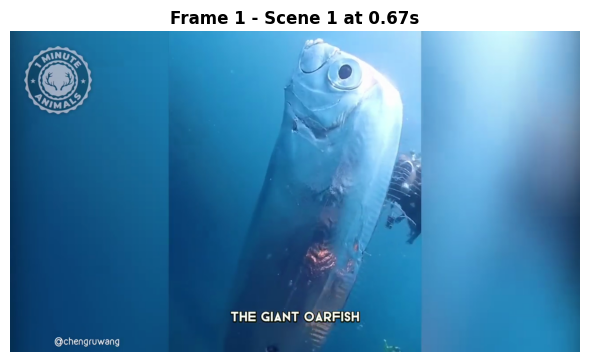


📋 MARINE ANIMALS (High Confidence):
   🟢 large fish: 0.802

📋 HUMANS (High Confidence):
   🟢 diver: 0.812

📋 WATER ENVIRONMENTS (High Confidence):
   🟢 deep sea: 0.954

📋 GENERAL CONTENT (High Confidence):
   🟢 interesting content: 0.988

📊 FRAME 1 SUMMARY:
   • Quality: HIGH
   • Best confidence: 0.988
   • High confidence features (>0.7): 4

────────────────────────────────────────────────────────────

🖼️  FRAME 2/5:
   Scene 2 at 1.94s
   Duration: 1.21s


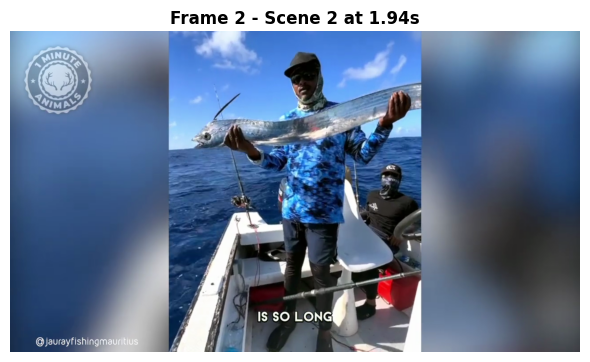


📋 MARINE ANIMALS (High Confidence):
   🟢 large fish: 0.850

📋 LAND ANIMALS (High Confidence):
   🟢 wild animal: 0.752

📋 IMAGE COMPOSITION (High Confidence):
   🟢 medium shot: 0.909

📋 GENERAL CONTENT (High Confidence):
   🟢 interesting content: 0.991

📊 FRAME 2 SUMMARY:
   • Quality: HIGH
   • Best confidence: 0.991
   • High confidence features (>0.7): 4

────────────────────────────────────────────────────────────

🖼️  FRAME 3/5:
   Scene 3 at 3.88s
   Duration: 2.67s


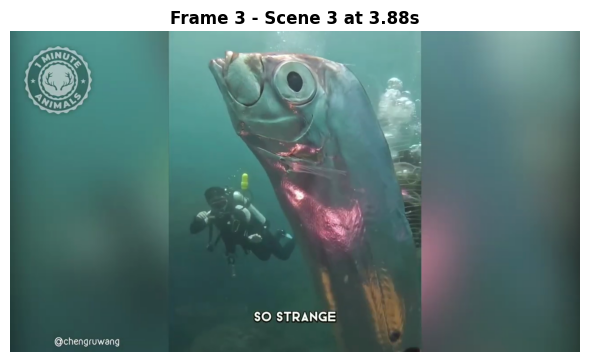


📋 HUMANS (High Confidence):
   🟢 diver: 0.719

📋 WATER ENVIRONMENTS (High Confidence):
   🟢 deep sea: 0.854

📋 LIGHTING CONDITIONS (High Confidence):
   🟢 underwater lighting: 0.801

📋 GENERAL CONTENT (High Confidence):
   🟢 interesting content: 0.993

📊 FRAME 3 SUMMARY:
   • Quality: HIGH
   • Best confidence: 0.993
   • High confidence features (>0.7): 4

────────────────────────────────────────────────────────────

🖼️  FRAME 4/5:
   Scene 4 at 5.78s
   Duration: 1.13s


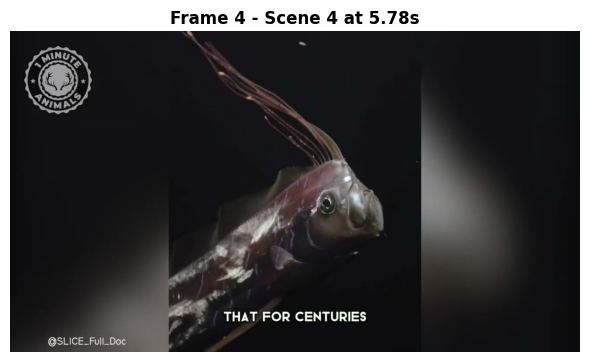


📋 WATER ENVIRONMENTS (High Confidence):
   🟢 deep sea: 0.921

📋 GENERAL CONTENT (High Confidence):
   🟢 interesting content: 0.997

📊 FRAME 4 SUMMARY:
   • Quality: HIGH
   • Best confidence: 0.997
   • High confidence features (>0.7): 2

────────────────────────────────────────────────────────────

🖼️  FRAME 5/5:
   Scene 5 at 8.32s
   Duration: 3.96s


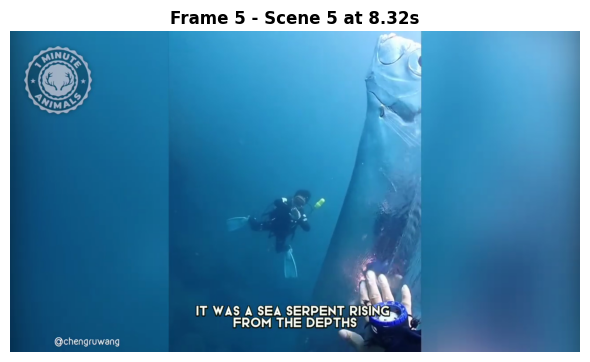


📋 HUMANS (High Confidence):
   🟢 diver: 0.951

📋 MOVEMENTS (High Confidence):
   🟢 diving: 0.780

📋 GENERAL CONTENT (High Confidence):
   🟢 interesting content: 0.960

📊 FRAME 5 SUMMARY:
   • Quality: HIGH
   • Best confidence: 0.960
   • High confidence features (>0.7): 3
[17:04:07.451] ✅ Comprehensive analysis of 5 frames completed


In [27]:
# Test with first 5 keyframes
if 'oarfish_frames' in globals() and len(oarfish_frames) > 0:
    log_time("=== Starting Comprehensive OpenCLIP Analysis ===")
    
    frames_to_analyze = min(5, len(oarfish_frames))  # Analyze up to 5 frames
    
    print("🎯 Comprehensive Analysis Results:")
    print("=" * 60)
    
    for frame_idx in range(frames_to_analyze):
        frame_info = oarfish_frames[frame_idx]
        
        # Analyze current frame
        result = analyze_frame_with_fallback(
            frame_info['frame_data'], 
            confidence_threshold=0.20
        )
        
        print(f"\n🖼️  FRAME {frame_idx + 1}/5:")
        print(f"   Scene {frame_info['scene_number']} at {frame_info['timestamp']:.2f}s")
        print(f"   Duration: {frame_info['scene_duration']:.2f}s")
        
        # Show the image using plt.figure
        plt.figure(figsize=(6, 4))
        plt.imshow(frame_info['frame_data'])
        plt.title(f"Frame {frame_idx + 1} - Scene {frame_info['scene_number']} at {frame_info['timestamp']:.2f}s", 
                  fontsize=12, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        # Show analysis results for this frame - ONLY confidence > 0.7
        high_confidence_found = False
        for category, items in result.items():
            if category != "analysis_metadata" and category != "fallback_classification":
                # Filter items with confidence > 0.7
                high_confidence_items = [item for item in items if item['confidence'] > 0.7]
                
                if high_confidence_items:
                    if not high_confidence_found:  # First high confidence category
                        high_confidence_found = True
                    
                    print(f"\n📋 {category.upper().replace('_', ' ')} (High Confidence):")
                    for item in high_confidence_items:
                        print(f"   🟢 {item['label']}: {item['confidence']:.3f}")
        
        # If no high confidence results found, show a message
        if not high_confidence_found:
            print(f"\n⚠️  No high confidence results (>0.7) found for this frame")
            # Show top result from metadata
            metadata = result["analysis_metadata"]
            print(f"   Highest confidence achieved: {metadata['max_confidence']:.3f}")
        
        # Show fallback if present
        if "fallback_classification" in result:
            fallback = result["fallback_classification"]
            if fallback['confidence'] > 0.7:
                print(f"\n⚠️  FALLBACK (High Confidence):")
                print(f"   🟢 {fallback['label']}: {fallback['confidence']:.3f}")
                print(f"   Note: {fallback['note']}")
        
        # Show metadata summary
        metadata = result["analysis_metadata"]
        print(f"\n📊 FRAME {frame_idx + 1} SUMMARY:")
        print(f"   • Quality: {metadata['analysis_quality'].upper()}")
        print(f"   • Best confidence: {metadata['max_confidence']:.3f}")
        print(f"   • High confidence features (>0.7): {sum(1 for category, items in result.items() if category not in ['analysis_metadata', 'fallback_classification'] for item in items if item['confidence'] > 0.7)}")
        
        # Add separator between frames
        if frame_idx < frames_to_analyze - 1:  # Don't add separator after last frame
            print("\n" + "─" * 60)
    
    log_time("✅ Comprehensive analysis of 5 frames completed")

else:
    print("❌ oarfish_frames not found. Please run frame extraction first.")